## Coin Detection using OpenCV in Python

## NAME: MUKESH KUMAR S

## REG NO : 212223240099

Total coins detected: 8


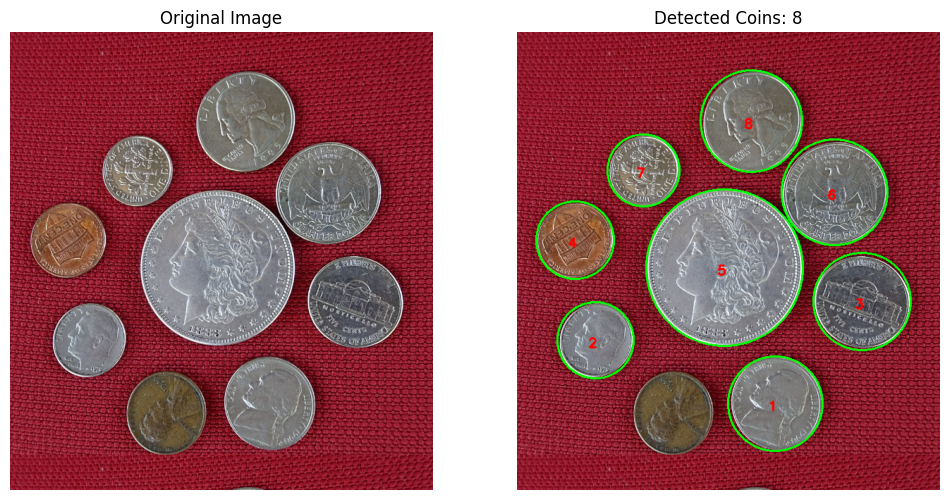

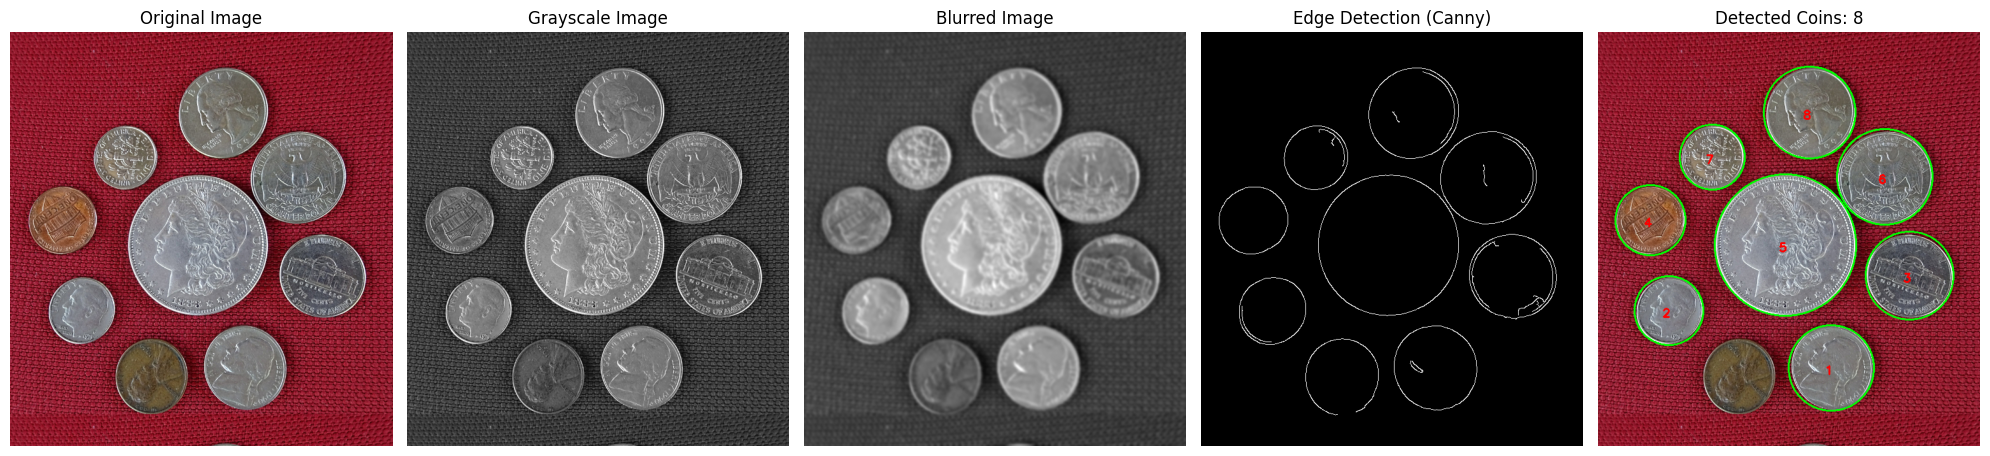

In [3]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
image_path = "/content/CoinsA.png"
# Load image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
edges = cv2.Canny(blurred, 30, 150)
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = image.copy()

coin_count = 0
for contour in contours:
    # Filter out small contours (noise)
    area = cv2.contourArea(contour)
    if area < 300:
        continue

    # Draw contour
    ((x, y), radius) = cv2.minEnclosingCircle(contour)
    if radius > 15:
        coin_count += 1
        cv2.circle(output, (int(x), int(y)), int(radius), (0, 255, 0), 2)
        cv2.putText(output, f"{coin_count}", (int(x - 10), int(y + 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

print(f"Total coins detected: {coin_count}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title(f"Detected Coins: {coin_count}")
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 6))

axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(gray, cmap='gray')
axs[1].set_title("Grayscale Image")
axs[1].axis("off")

axs[2].imshow(blurred, cmap='gray')
axs[2].set_title("Blurred Image")
axs[2].axis("off")

axs[3].imshow(edges, cmap='gray')
axs[3].set_title("Edge Detection (Canny)")
axs[3].axis("off")

axs[4].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[4].set_title(f"Detected Coins: {coin_count}")
axs[4].axis("off")

plt.tight_layout()
plt.show()
